<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_05_python_student_solution_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# O1NAEX Exercise 05

##	Problem 6.1
from the chapter 6, D. C. Montgomery DAoE - 8. edition.

An engineer is interested in the effects of cutting
speed (A), tool geometry (B), and cutting angle (C) on the life
(in hours) of a machine tool. Two levels of each factor are
chosen, and three replicates of a 23 factorial design are run.
The results are as follows:

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np


df61 = pd.read_csv("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Problem_6_1.txt", sep=";")
df61.head(8)

,CuttingSpeed,ToolGeometry,CuttingAngle,LifeHours
0,-1,-1,-1,22
1,-1,-1,-1,31
2,-1,-1,-1,25
3,1,-1,-1,32
4,1,-1,-1,43
5,1,-1,-1,29
6,-1,1,-1,35
7,-1,1,-1,34



1. Estimate the factor effects. Which effects appear to be
large?
2. Use the analysis of variance to confirm your conclusions
for part (a).Examine the interaction effects between cutting speed (A) and tool geometry (B). How do these interactions influence tool life compared to the main effects?
3. Write down a regression model for predicting tool life
(in hours) based on the results of this experiment.
4. Analyze the residuals. Are there any obvious problems?
5. On the basis of an analysis of main effect and interaction
plots, what coded factor levels of A, B, and C
would you recommend using?
6. Reconsider task 3. Use the regression
model to generate response surface and contour plots of the
tool life response. Interpret these plots. Do they provide insight
regarding the desirable operating conditions for this process?
7. Find the standard error of the factor effects and
approximate 95 percent confidence limits for the factor effects. Do the results of this analysis agree with the conclusions from the analysis of variance?
8. Given the results from your analysis of variance and the regression model, what specific settings for cutting speed (A), tool geometry (B), and cutting angle (C) would you recommend for maximizing tool life? Justify your recommendations with supporting data.
9. Conduct a sensitivity analysis to determine how changes in each factor (A, B, and C) impact the variability of tool life. Which factor has the most significant effect on tool life variability, and how might this influence future experimental designs?



###1., 3., 4.


                            OLS Regression Results                            
Dep. Variable:              LifeHours   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     6.716
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00257
Time:                        23:02:04   Log-Likelihood:                -79.326
No. Observations:                  24   AIC:                             166.7
Df Residuals:                      20   BIC:                             171.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               31.5833 

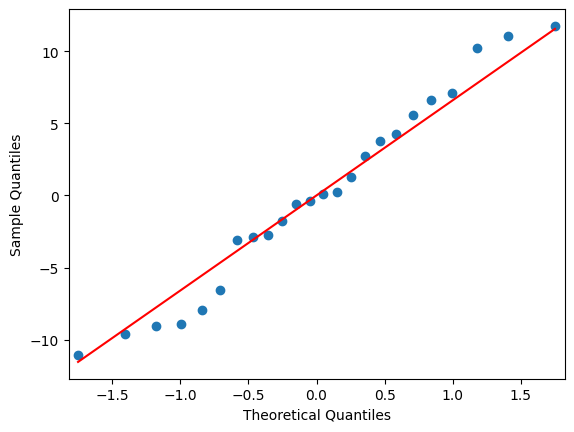

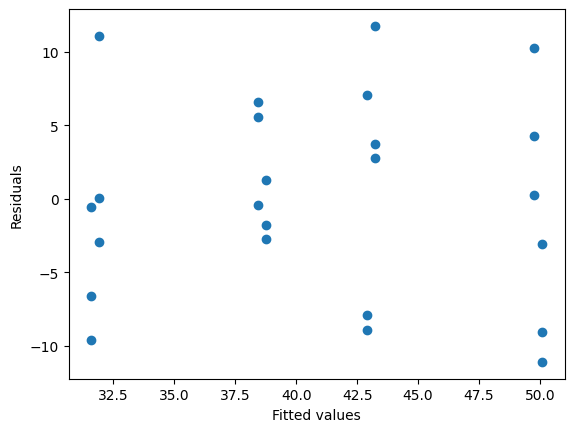

In [2]:
model = smf.ols('LifeHours ~ C(CuttingSpeed) + C(ToolGeometry) + C(CuttingAngle)', data=df61).fit()
print(model.summary())
residuals = model.resid
qq_plot = sm.qqplot(residuals, line='s')
plt.show()
plt.plot(model.fittedvalues, residuals, 'o')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

1 - relative to the intercept values (expected lifetime, with setting -1 at all variables), tool geometry and cutting angle are both significant and have large affect on life time, cutting speed is not significant

4 - Residuals seem to be normally distributed (QQ-plot and JB test), slight negative autocorrelation (DW), res vs. fitted plot does not indicate heteroskedasticity.

3 - The regression model for predicting tool life (in hours) based on the model without interactions is:

**LifeHours = 31.6 + 1/3 * A + 11.3 * B + 6.83 * C**

Where:
*   **A** represents Cutting Speed (-1 or +1)
*   **B** represents Tool Geometry (-1 or +1)
*   **C** represents Cutting Angle (-1 or +1)

###2., 5.

In [3]:
model_full = smf.ols('LifeHours ~ C(CuttingSpeed) + C(ToolGeometry) + C(CuttingAngle) + C(CuttingSpeed):C(ToolGeometry) + C(CuttingSpeed):C(CuttingAngle) + C(ToolGeometry):C(CuttingAngle)', data=df61).fit()
print(model_full.summary())
anova_table = sm.stats.anova_lm(model_full, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:              LifeHours   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     8.788
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           0.000188
Time:                        23:02:06   Log-Likelihood:                -70.750
No. Observations:                  24   AIC:                             155.5
Df Residuals:                      17   BIC:                             163.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

2 - Despite cutting speed being insignificant in model without interactions, Speed:Angle is a significant interaction with large negative coefficient

5 - Based on the coefficients in the previous model (without interactions), their significance and coefficient for the interaction **A:C**, the recommended levels are:

*  **A**: -1

*  **B**: +1

*  **C**: +1

###6.


In [4]:
import itertools

coding_levels = [-1, 1]
combinations = list(itertools.product(coding_levels, coding_levels))
plot_data = pd.DataFrame(combinations, columns=['CuttingSpeed', 'CuttingAngle'])
plot_data['ToolGeometry'] = 1

plot_data['PredictedLifeHours'] = model_full.predict(plot_data)

print(plot_data)

   CuttingSpeed  CuttingAngle  ToolGeometry  PredictedLifeHours
0            -1            -1             1           40.750000
1            -1             1             1           53.583333
2             1            -1             1           48.250000
3             1             1             1           43.416667


Visualize the predicted tool life across different combinations of factors.



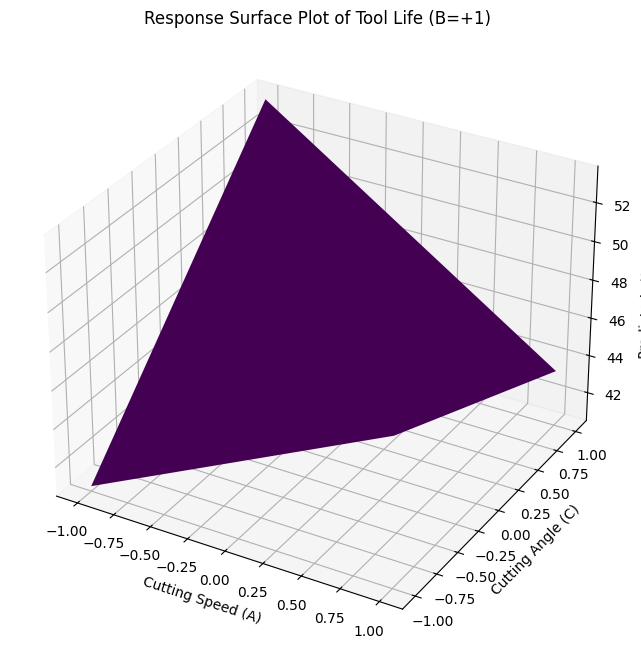

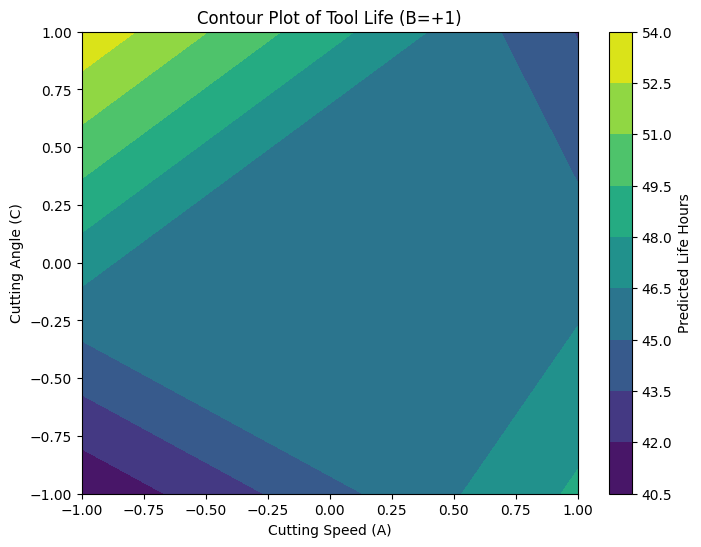

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Reshape the data for plotting
X = plot_data['CuttingSpeed'].unique()
Y = plot_data['CuttingAngle'].unique()
X, Y = np.meshgrid(X, Y)

Z = plot_data.pivot(index='CuttingAngle', columns='CuttingSpeed', values='PredictedLifeHours').values

# Create 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Cutting Speed (A)')
ax.set_ylabel('Cutting Angle (C)')
ax.set_zlabel('Predicted Life Hours')
ax.set_title('Response Surface Plot of Tool Life (B=+1)')
plt.show()

# Create Contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar(contour, label='Predicted Life Hours')
plt.xlabel('Cutting Speed (A)')
plt.ylabel('Cutting Angle (C)')
plt.title('Contour Plot of Tool Life (B=+1)')
plt.show()

The plots clearly support our recommendation.

###7.
(based on model without interactions)

In [6]:
model_params = model.params
model_std_err = model.bse
model_conf_int = model.conf_int(alpha=0.05)

effects_summary = pd.DataFrame({
    'Coefficient': model_params,
    'Standard Error': model_std_err,
    '95% CI Lower': model_conf_int[0],
    '95% CI Upper': model_conf_int[1]
})

factor_effects_summary = effects_summary.filter(like='C(', axis=0)

display(factor_effects_summary)
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)


,Coefficient,Standard Error,95% CI Lower,95% CI Upper
C(CuttingSpeed)[T.1],0.333333,2.949341,-5.818884,6.48555
C(ToolGeometry)[T.1],11.333333,2.949341,5.181116,17.48555
C(CuttingAngle)[T.1],6.833333,2.949341,0.681116,12.98555


,sum_sq,df,F,PR(>F)
C(CuttingSpeed),0.666667,1.0,0.012773,0.911142
C(ToolGeometry),770.666667,1.0,14.766087,0.001016
C(CuttingAngle),280.166667,1.0,5.368034,0.031232
Residual,1043.833333,20.0,NaN,NaN


In [7]:
grouped_variance = df61.groupby(['CuttingSpeed', 'ToolGeometry', 'CuttingAngle'])['LifeHours'].var()
lifehours_variance_df = grouped_variance.reset_index()
lifehours_variance_df.rename(columns={'LifeHours': 'LifeHours_Variance'}, inplace=True)
display(lifehours_variance_df)

,CuttingSpeed,ToolGeometry,CuttingAngle,LifeHours_Variance
0,-1,-1,-1,21.000000
1,-1,-1,1,14.333333
2,-1,1,-1,80.333333
3,-1,1,1,25.333333
4,1,-1,-1,54.333333
5,1,-1,1,4.333333
6,1,1,-1,24.333333
7,1,1,1,17.333333


###8., 9.

In [8]:
avg_variance_cutting_speed = lifehours_variance_df.groupby('CuttingSpeed')['LifeHours_Variance'].mean()
avg_variance_tool_geometry = lifehours_variance_df.groupby('ToolGeometry')['LifeHours_Variance'].mean()
avg_variance_cutting_angle = lifehours_variance_df.groupby('CuttingAngle')['LifeHours_Variance'].mean()
avg_variance_cutting_speed_angle = lifehours_variance_df.groupby(['CuttingAngle', 'CuttingSpeed'])['LifeHours_Variance'].mean()

print("Average Variance by Cutting Speed:\n", avg_variance_cutting_speed)
print("\nAverage Variance by Tool Geometry:\n", avg_variance_tool_geometry)
print("\nAverage Variance by Cutting Angle:\n", avg_variance_cutting_angle)
print("\nAverage Variance by Cutting Speed and Cutting Angle Interaction:\n", avg_variance_cutting_speed_angle)

Average Variance by Cutting Speed:
 CuttingSpeed
-1    35.250000
 1    25.083333
Name: LifeHours_Variance, dtype: float64

Average Variance by Tool Geometry:
 ToolGeometry
-1    23.500000
 1    36.833333
Name: LifeHours_Variance, dtype: float64

Average Variance by Cutting Angle:
 CuttingAngle
-1    45.000000
 1    15.333333
Name: LifeHours_Variance, dtype: float64

Average Variance by Cutting Speed and Cutting Angle Interaction:
 CuttingAngle  CuttingSpeed
-1            -1              50.666667
               1              39.333333
 1            -1              19.833333
               1              10.833333
Name: LifeHours_Variance, dtype: float64


Based on the calculated average variances:

*   **Cutting Speed (A)**:
    *   Difference: |35.25 - 25.08| = 10.17

*   **Tool Geometry (B)**:
    *   Difference: |23.50 - 36.83| = 13.33

*   **Cutting Angle (C)**:
    *   Difference: |45.00 - 15.33| = 29.67

* **C:A**:
    *   Differences:
    *   (-1 : -1,1): |50.67 - 39.33| = 11.34
    *   (1 : -1,1):  |19.83 - 10.83| = 9

Comparing the differences, **Cutting Angle (C)** has the largest difference in average variance between its levels (29.67), indicating it has the most significant impact on tool life variability. Operating at Cutting Angle C=1 (average variance 15.33) results in considerably lower variability compared to C=-1 (average variance 45.00).

Inspecting the differences in average variance when grouped by interactions between cutting speec and angle, we see that the differences are not significant when changing **(A)** but are sensitive to cutting angle **(C)**.

### Implications for Future Experimental Designs

Based on the variability analysis, the **Cutting Angle (C)** appears to be the most influential factor on tool life variability. This significant difference suggests that the choice of cutting angle has a substantial impact on the consistency of tool life.

#### Future Experimental Designs:

Maintain the cutting angle at +1 or investigate why -1 leads to higher variability.

Explore intermediate levels or even a wider range around the +1 level for Cutting Angle.
